In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("customer_churn.csv")

In [4]:
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [5]:
df.shape

(900, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [23]:
dd=pd.read_csv("new_customers.csv",usecols=['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company'])

In [24]:
dd.head(10)

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company
0,Andrew Mccall,37.0,9935.53,1,7.71,8.0,2011-08-29 18:37:54,"38612 Johnny Stravenue Nataliebury, WI 15717-8316",King Ltd
1,Michele Wright,23.0,7526.94,1,9.28,15.0,2013-07-22 18:19:54,"21083 Nicole Junction Suite 332, Youngport, ME...",Cannon-Benson
2,Jeremy Chang,65.0,100.00,1,1.00,15.0,2006-12-11 07:48:13,"085 Austin Views Lake Julialand, WY 63726-4298",Barron-Robertson
3,Megan Ferguson,32.0,6487.50,0,9.40,14.0,2016-10-28 05:32:13,"922 Wright Branch North Cynthialand, NC 64721",Sexton-Golden
4,Taylor Young,32.0,13147.71,1,10.00,8.0,2012-03-20 00:36:46,Unit 0789 Box 0734 DPO AP 39702,Wood LLC
5,Jessica Drake,22.0,8445.26,1,3.46,14.0,2011-02-04 19:29:27,1148 Tina Stravenue Apt. 978 South Carlos TX 2...,Parks-Robbins


In [22]:
dd.columns

Index(['Names', 'Age', 'Total_Purchase', 'Account_Manager', 'Years',
       'Num_Sites', 'Onboard_date', 'Location', 'Company'],
      dtype='object')

In [9]:
dd.shape

(6, 9)

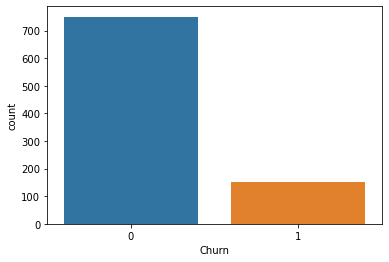

In [11]:
sns.countplot(df["Churn"])

In [13]:
df["Churn"].value_counts()

0    750
1    150
Name: Churn, dtype: int64

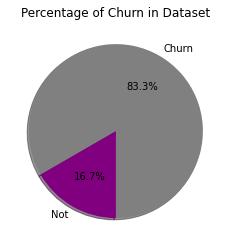

In [20]:
sizes = df['Churn'].value_counts(sort = True)
colors = ["grey","purple"] 

# Plot
plt.pie(sizes, colors=colors,labels=["Churn","Not"],
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Churn in Dataset')
plt.show()

In [21]:
df.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

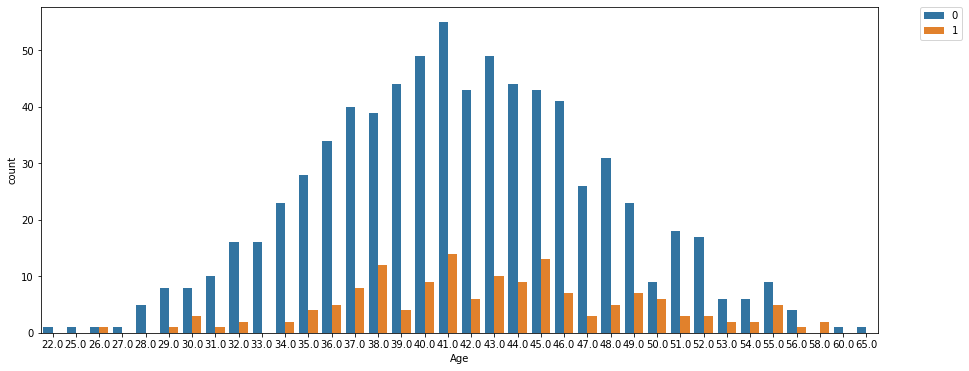

In [31]:
plt.figure(figsize=(15,6))

sns.countplot(df["Age"],hue=df["Churn"])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

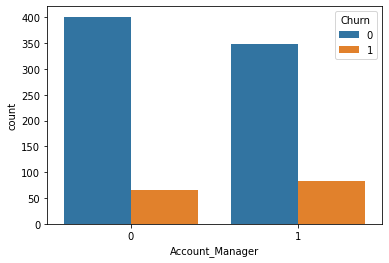

In [32]:
sns.countplot(df["Account_Manager"],hue=df["Churn"])

In [45]:
sf=df.copy()

In [47]:
m=0
l=0
for i in range(len(sf["Years"])):
    if sf["Years"][i]>4:
        sf["Years"][i]="above 4"
    else:
        sf["Years"][i]="below 4"


C:\Users\gurdit\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\gurdit\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\gurdit\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [43]:
a=df[(df["Years"]>4)]

In [ ]:
# people who were customers for more than 4 years have churned in comparison to less than 4 years

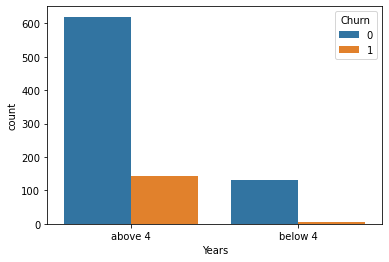

In [48]:
sns.countplot(sf["Years"],hue=df["Churn"])

In [51]:
sf.tail()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
895,Paul Miller,42.0,12800.82,1,below 4,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0
896,Natalie Hodges,52.0,9893.92,0,above 4,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0
897,Ana Smith,45.0,12056.18,0,above 4,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0
898,Justin Leonard,51.0,6517.93,1,above 4,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0
899,Joseph Williams,39.0,9315.60,1,above 4,10.0,2010-09-25 12:16:08,"27252 Olivia Burgs Rivasmouth, MN 80121-6348",Davis Group,0


In [50]:
df.tail()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
895,Paul Miller,42.0,12800.82,1,3.62,8.0,2007-12-01 13:29:34,"9316 Julian Fort Suite 328 North Leslie, ME 43961",Evans-Lucero,0
896,Natalie Hodges,52.0,9893.92,0,6.91,7.0,2008-12-28 15:23:58,"8419 William Square Apt. 695 Martinville, RI 3...",Perry and Sons,0
897,Ana Smith,45.0,12056.18,0,5.46,4.0,2014-06-20 05:10:09,Unit 8633 Box 8738 DPO AA 14126-5026,Schneider-Smith,0
898,Justin Leonard,51.0,6517.93,1,5.47,10.0,2012-05-30 00:15:43,"49800 Torres Ways Suite 886 West Bradleybury, ...",Robles-Abbott,0
899,Joseph Williams,39.0,9315.60,1,5.02,10.0,2010-09-25 12:16:08,"27252 Olivia Burgs Rivasmouth, MN 80121-6348",Davis Group,0


In [55]:
df.drop("Names",axis=1,inplace=True)

In [56]:
df.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [57]:
df.drop("Onboard_date",axis=1,inplace=True)

In [58]:
df.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Location,Company,Churn
0,42.0,11066.80,0,7.22,8.0,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,41.0,11916.22,0,6.50,11.0,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,38.0,12884.75,0,6.67,12.0,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,42.0,8010.76,0,6.71,10.0,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,37.0,9191.58,0,5.56,9.0,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [59]:
loc=pd.get_dummies(df["Location"])

In [60]:
com=pd.get_dummies(df["Company"])

In [61]:
df1=df.copy()
df1.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Location,Company,Churn
0,42.0,11066.80,0,7.22,8.0,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,41.0,11916.22,0,6.50,11.0,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,38.0,12884.75,0,6.67,12.0,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,42.0,8010.76,0,6.71,10.0,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,37.0,9191.58,0,5.56,9.0,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [62]:
df1.drop("Location",axis=1,inplace=True)
df1.drop("Company",axis=1,inplace=True)

In [65]:
df2=pd.concat([df1,loc,com],axis=1)

In [66]:
df2.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn,"00103 Jeffrey Crest Apt. 205 Padillaville, IA 90755","00154 Ashley Course Shannonville, UT 52907","002 Gutierrez Mountains Hayesburgh, GU 73502-4691","007 Davis Squares Flynnchester, SC 79849",...,"Yates, Martinez and Cox",Young and Sons,"Young, Porter and Hill",Young-Dunn,Young-Newman,Yu-Murillo,Zamora-Cherry,Zhang-Brown,Zimmerman Group,"Zuniga, Clark and Shaffer"
0,42.0,11066.80,0,7.22,8.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,41.0,11916.22,0,6.50,11.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38.0,12884.75,0,6.67,12.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,42.0,8010.76,0,6.71,10.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37.0,9191.58,0,5.56,9.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
df.corr()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
Age,1.000000,-0.037208,-0.014749,0.005625,-0.006070,0.085926
Total_Purchase,-0.037208,1.000000,0.015856,-0.005623,-0.003390,0.024031
Account_Manager,-0.014749,0.015856,1.000000,0.022930,0.033401,0.070611
Years,0.005625,-0.005623,0.022930,1.000000,0.051642,0.214329
Num_Sites,-0.006070,-0.003390,0.033401,0.051642,1.000000,0.525398
Churn,0.085926,0.024031,0.070611,0.214329,0.525398,1.000000


In [69]:
df1.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Churn
0,42.0,11066.80,0,7.22,8.0,1
1,41.0,11916.22,0,6.50,11.0,1
2,38.0,12884.75,0,6.67,12.0,1
3,42.0,8010.76,0,6.71,10.0,1
4,37.0,9191.58,0,5.56,9.0,1


In [76]:
X=df1.iloc[:,:5]
X.head()

,Age,Total_Purchase,Account_Manager,Years,Num_Sites
0,42.0,11066.80,0,7.22,8.0
1,41.0,11916.22,0,6.50,11.0
2,38.0,12884.75,0,6.67,12.0
3,42.0,8010.76,0,6.71,10.0
4,37.0,9191.58,0,5.56,9.0


In [77]:
y=df1.iloc[:,5:]
y.head()

,Churn
0,1
1,1
2,1
3,1
4,1


In [81]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=df1["Churn"])

In [82]:
y_train["Churn"].value_counts()

0    600
1    120
Name: Churn, dtype: int64

In [83]:
y_test["Churn"].value_counts()

0    150
1     30
Name: Churn, dtype: int64

In [84]:
model = LogisticRegression(random_state = 10, class_weight='balanced', max_iter = 1000)
model.fit(X_train,y_train)

C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=10)

In [85]:
print('classes: ',model.classes_)
print('coefficients: ',model.coef_)
print('intercept :',model.intercept_)

classes:  [0 1]
coefficients:  [[ 5.75096652e-02 -4.37128024e-07  4.11271238e-01  6.51243509e-01
   1.10320405e+00]]
intercept : [-16.69632978]


In [86]:
pred1 = model.predict(X_test)

In [92]:
pred1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [93]:
y_test.head(10)

,Churn
390,0
604,0
796,0
249,0
706,0
810,0
202,0
111,1
278,0
882,0


In [95]:
labels = [1, 0]
con_mat1 = confusion_matrix(y_test, pred1, labels = labels )
print(con_mat1)

[[ 25   5]
 [ 19 131]]


In [98]:
accuracy=(con_mat1[0,0] + con_mat1[1,1])/y_test.size
print(accuracy)
model.score(X_test, y_test)

0.8666666666666667


0.8666666666666667

In [99]:
model_1=LogisticRegression(class_weight = 'balanced')
model_1.fit(X_train,y_train)
model_1.score(X_test, y_test)

C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.75

In [100]:
model_2=LogisticRegression(class_weight = {0:0.81, 1:1.31})
model_2.fit(X_train,y_train)
model_2.score(X_test, y_test)

C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.85

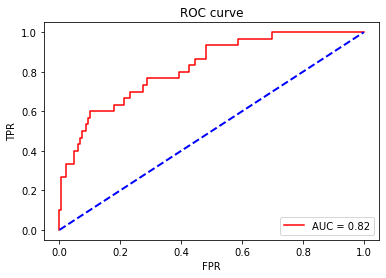

In [108]:
##Computing false and true positive rates
#fpr, tpr, threshold = roc_curve(y_test,result.predict_proba(X_test)[:,1],drop_intermediate=False)
probs = model_2.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds, drop_intermediate=False)
roc_auc = auc(fpr, tpr)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [109]:
roc_auc_score(y_test, preds)

0.8217777777777777

In [111]:
param_grid = { 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'),  param_grid)

In [112]:
clf.fit(X_train, y_train)

C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale t

C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale t

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [113]:
clf.best_score_

0.8569444444444445

In [114]:
clf.best_estimator_

LogisticRegression(C=0.01)

In [115]:
model = LogisticRegression(C = 0.01, random_state = 10, class_weight='balanced', max_iter = 1000)
model.fit(X_train,y_train)

C:\Users\gurdit\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=0.01, class_weight='balanced', max_iter=1000,
                   random_state=10)

In [118]:

probs = model.predict_proba(X_test)
preds = probs[:,1]
precision, recall, threshold = precision_recall_curve(y_test, preds)

(0.0, 1.0)

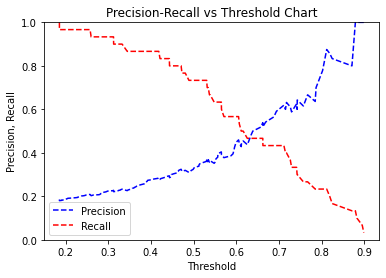

In [119]:
plt.title("Precision-Recall vs Threshold Chart")
plt.plot(threshold, precision[: -1], "b--", label="Precision")
plt.plot(threshold, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="best")
plt.ylim([0,1]) 

In [120]:
r=dd.copy()
r.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company
0,Andrew Mccall,37.0,9935.53,1,7.71,8.0,2011-08-29 18:37:54,"38612 Johnny Stravenue Nataliebury, WI 15717-8316",King Ltd
1,Michele Wright,23.0,7526.94,1,9.28,15.0,2013-07-22 18:19:54,"21083 Nicole Junction Suite 332, Youngport, ME...",Cannon-Benson
2,Jeremy Chang,65.0,100.00,1,1.00,15.0,2006-12-11 07:48:13,"085 Austin Views Lake Julialand, WY 63726-4298",Barron-Robertson
3,Megan Ferguson,32.0,6487.50,0,9.40,14.0,2016-10-28 05:32:13,"922 Wright Branch North Cynthialand, NC 64721",Sexton-Golden
4,Taylor Young,32.0,13147.71,1,10.00,8.0,2012-03-20 00:36:46,Unit 0789 Box 0734 DPO AP 39702,Wood LLC


In [121]:
r.drop(["Location","Company"],axis=1,inplace=True)

In [124]:
r.drop("Names",axis=1,inplace=True)

In [126]:
r.drop("Onboard_date",axis=1,inplace=True)

In [127]:
clf.predict(r)

array([0, 1, 0, 1, 0, 1], dtype=int64)

In [129]:
clf = DecisionTreeClassifier(max_leaf_nodes= 9)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=9)

In [131]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8777777777777778

In [159]:
clf2 = DecisionTreeClassifier(criterion='entropy')
clf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [160]:
y_pred = clf2.predict(X_test)
accuracy_score(y_test, y_pred)

0.8555555555555555

In [161]:
labels = [1, 0]
con_mat1 = confusion_matrix(y_test, y_pred, labels = labels )
print(con_mat1)

[[ 14  16]
 [ 10 140]]


In [141]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {'criterion':['gini','entropy'], 'max_depth': [3,5,7,20, 30]}

gs_inst = GridSearchCV(clf,param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_leaf_nodes=9),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 20, 30]})

In [142]:
y_pred_gs = gs_inst.predict(X_test)
accuracy_score(y_test, y_pred_gs)

0.8944444444444445

In [143]:
gs_inst.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [144]:
for i, j in zip(gs_inst.cv_results_['mean_test_score'],gs_inst.cv_results_['params']):
    print(i, j)

0.8777777777777777 {'criterion': 'gini', 'max_depth': 3}
0.8666666666666668 {'criterion': 'gini', 'max_depth': 5}
0.8666666666666668 {'criterion': 'gini', 'max_depth': 7}
0.8666666666666668 {'criterion': 'gini', 'max_depth': 20}
0.8666666666666668 {'criterion': 'gini', 'max_depth': 30}
0.8777777777777779 {'criterion': 'entropy', 'max_depth': 3}
0.875 {'criterion': 'entropy', 'max_depth': 5}
0.875 {'criterion': 'entropy', 'max_depth': 7}
0.875 {'criterion': 'entropy', 'max_depth': 20}
0.875 {'criterion': 'entropy', 'max_depth': 30}


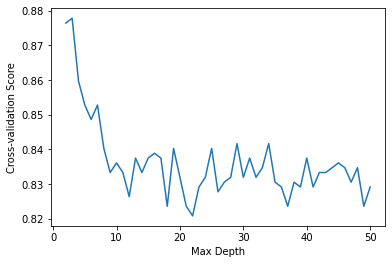

In [145]:
dtc = DecisionTreeClassifier()
max_depths = range(2,51)
param_grid = {'max_depth' : max_depths}
gs_inst = GridSearchCV(dtc, param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)
plt.plot(max_depths,gs_inst.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel("Cross-validation Score");

In [146]:
gs_inst.best_params_

{'max_depth': 3}

In [150]:
clf2.predict(r)

array([0, 0, 0, 1, 0, 0], dtype=int64)

In [152]:
clf.predict(r)

array([0, 1, 0, 1, 0, 0], dtype=int64)

In [156]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

C:\Users\gurdit\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(max_depth=2, random_state=0)

In [158]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8388888888888889

In [157]:
labels = [1, 0]
con_mat1 = confusion_matrix(y_test, y_pred, labels = labels )
print(con_mat1)

[[  2  28]
 [  1 149]]


0.8388888888888889

In [155]:
clf.predict(r)

array([0, 1, 0, 1, 0, 0], dtype=int64)